In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. **Load and Explore the Data**

In [2]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [5]:
print(df.head())  # View the first few rows
print(df.info())  # Check for missing values and data types
print(df.describe())  # Summary statistics

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

**Exploratory Data Analysis(EDA)**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


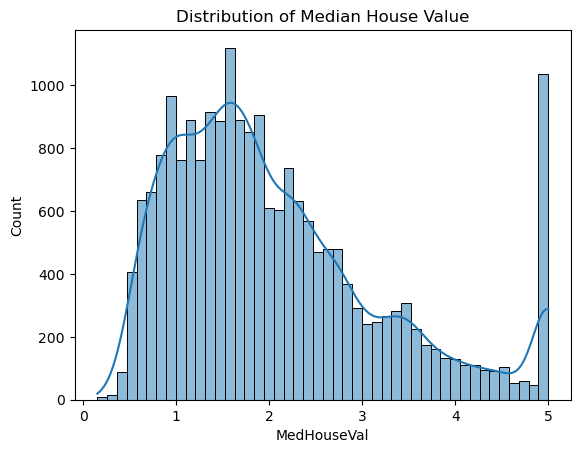

In [7]:
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()

**check correlations**

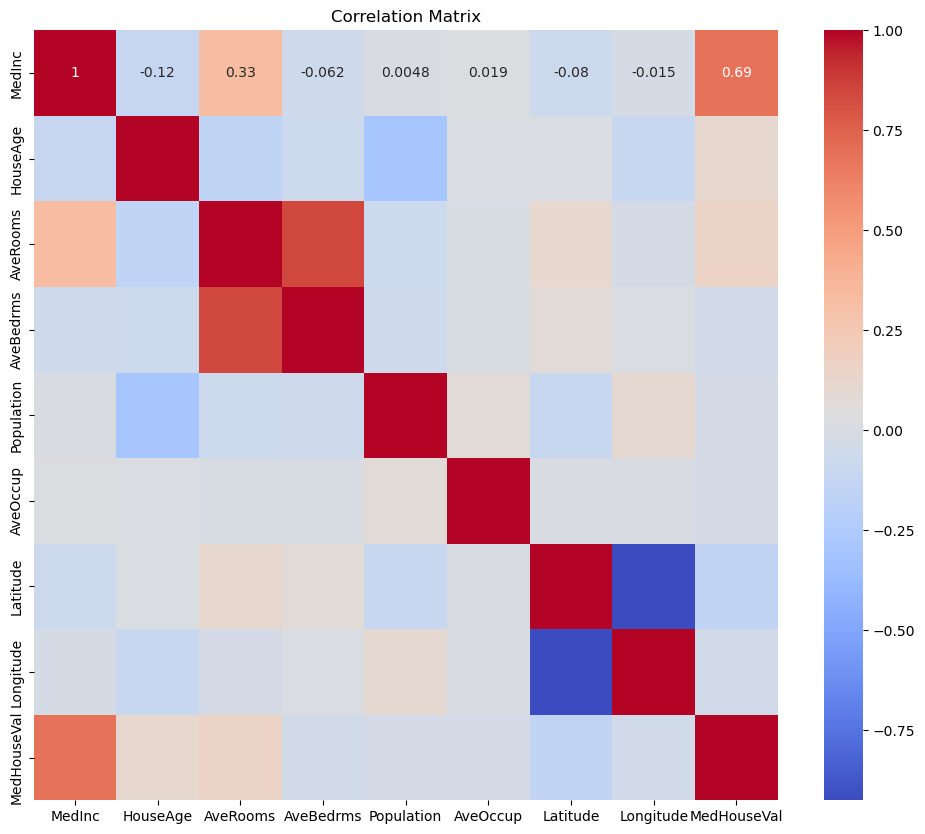

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Visualize relationships**

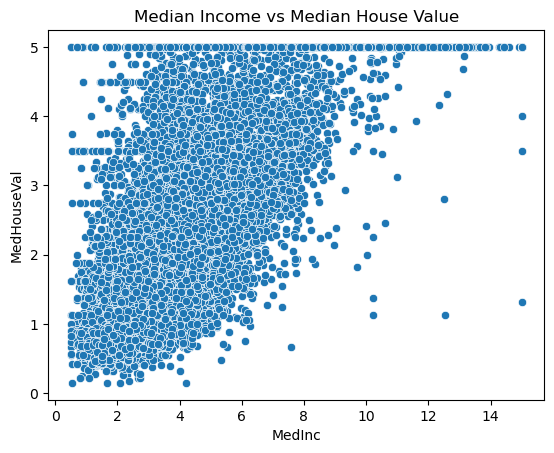

In [14]:
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.title('Median Income vs Median House Value')
plt.show()

In [15]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

**Split data into training and testing splits**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

**Build and train Models**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [21]:
#Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [23]:
#predictions
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)

In [25]:
#Evaluate models
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse: .4f},  R²: {r2:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression - MSE:  0.5389,  R²: 0.5888
Random Forest - MSE:  0.6330,  R²: 0.5170


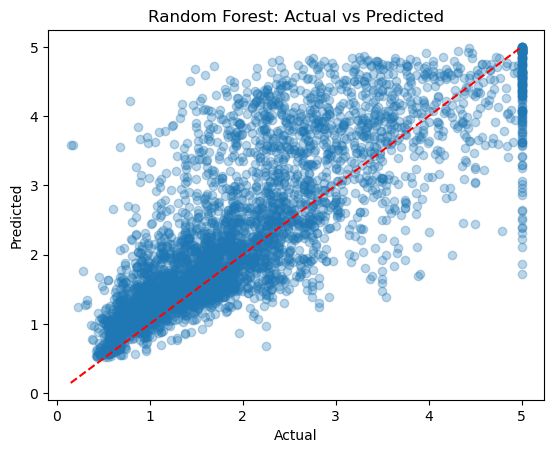

In [26]:
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

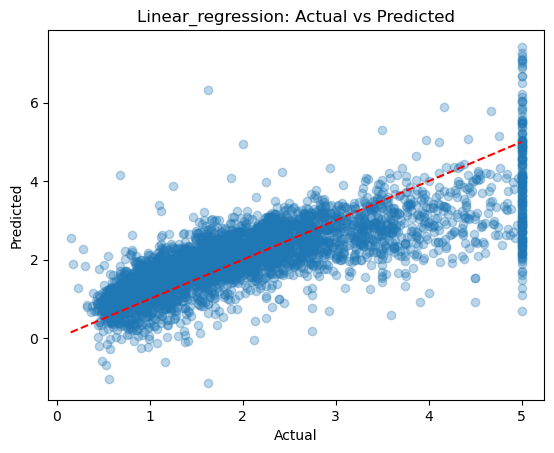

In [27]:
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear_regression: Actual vs Predicted')
plt.show()

**Linear Regression:**

Mean Squared Error (MSE): 0.5389

R² Score: 0.5888

Random Forest:

Mean Squared Error (MSE): 0.6330

R² Score: 0.5170

Which Model Performs Better?
Mean Squared Error (MSE):

MSE measures the average squared difference between the actual and predicted values. Lower MSE is better.

Linear Regression has a lower MSE (0.5389) compared to Random Forest (0.6330), meaning it makes smaller errors on average.

R² Score (Coefficient of Determination):

R² measures how well the model explains the variance in the target variable. Higher R² is better.

Linear Regression has a higher R² (0.5888) compared to Random Forest (0.5170), meaning it explains more of the variance in the targe:
t variable.

Conclusion
Linear Regression performs better than Random Forest for this specific dataset and task, based on the metrics provided.

Linear Regression has a lower MSE and a higher R², indicating it is more accurate and explains more variance in the data.

Why Might Linear Regression Perform Better?
Dataset Size: If the dataset is small, Random Forest might overfit, while Linear Regression generalizes better.

Feature Relationships: If the relationship between features and the target is linear, Linear Regression will naturally perform better.

Hyperparameters: The Random Forest model might not be tuned properly. Hyperparameter tuning (e.g., n_estimators, max_depth) could improve its performance.